# **GU Orbit Deep Learning Workshop - Part 1**







**Contents:**


1.   What can you do using artifical neural networks?
2.   What are artificial neural networks?
3.   The classic neural network depiction, what does it represent?
4.   What are activation functions and why do we need them?
5.   Training a neural network to approximate the "sin(x)" function.
6.   **Do it yourself**: Train a neural network to approximate the "x^2" function.
7.   Training a neural network to classify a (x,y) point as belonging to either the "sin(x)" or the "x^2" function.
8. Generalisation and overfitting.

## **Some of the things you can do using Artificial Neural Networks:**

1.  Control Robots.
2.  Classify data (such as images).
3.  Compress data (such as images).
3.  Generate similar data (such as images).
4.  Generate data (such as images) using a descriptive source (such as text).

## **Q: What does a neural network do?**
## **A: All neural networks are fundamentally function approximators.**






# **What we will cover today:**



1.   what exactly a neural network is and how it works
2.   An introduction into high level deep learning libraries

## **Typical Neural network image:**
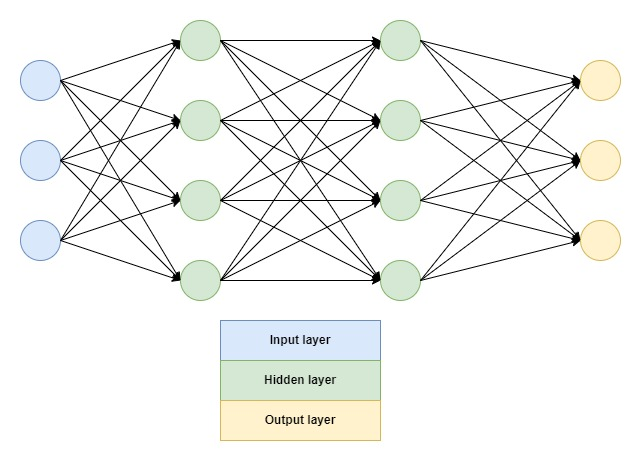


# **The basics**

## **A single Neuron**



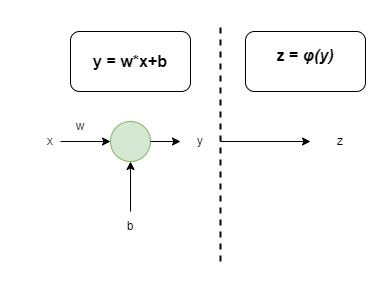

For the time being we will not worry about the activation function (*φ*), just note that it is some non-linear function that takes a numerical input and produces a numerical output. A neuron calculates the weighted sum of inputs plus a bias and then applies the activation function to the sum.

In this case the neuron has a weight w, and a bias b. The input is x.

In [ ]:
#neuron parameters
w = 2 # the weight of the neuron
b = 3 # the bias of the neuron

#input
x = 5 # the input

#ouput
y = w*x+b # the output

#printing ouput
print("The output y of the neuron is:", y)

The output y of the neuron is: 13


## **If we add two extra inputs the resulting neuron looks like this:**

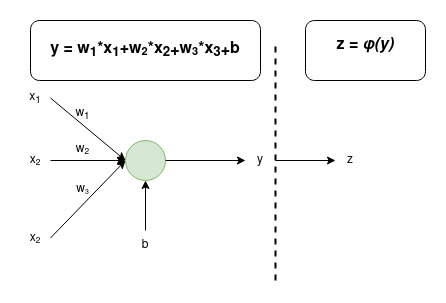

$y=(x_1*w_1+x_2*w_2+x_3*w_3)+b = (\sum\limits_{i=1}^{3}x_i*w_i)+b$

In [ ]:
#neuron parameters
w1=1
w2=2
w3=3
b=7

#inputs
x1=5
x2=10
x3=15

#ouput
y = x1*w1+x2*w2+x3*w3+b

#printing output
print("The output y of the neuron is:", y)

The output y of the neuron is: 77


## **We can also represent this as a matrix calculation :**


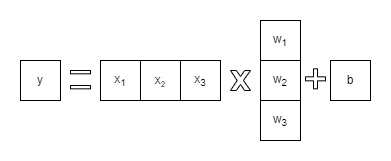

In [ ]:
#we can also write this using numpy arrays calculation
import numpy as np

#neuron parameters
w = np.array([[1], [2], [3]])
b = 7

#inputs
x = np.array([5, 10, 15])

#ouput
y = np.matmul(x,w) + b

#printing output
print("inputs:\n", x)
print("Weights:\n", w)

print("The output y of the neuron is:", y)

inputs:
 [ 5 10 15]
Weights:
 [[1]
 [2]
 [3]]
The output y of the neuron is: [77]


## **Lets add an extra neuron :**


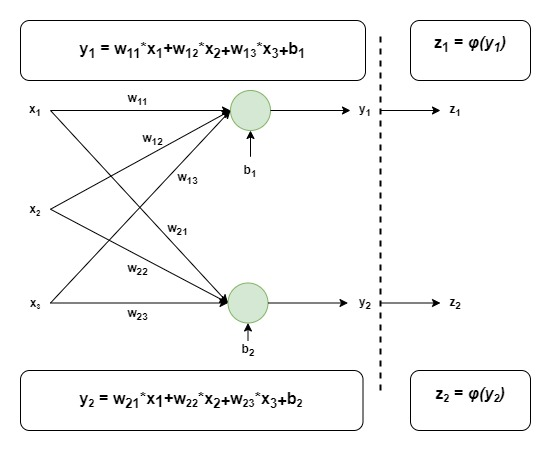

##**In matrix format:**
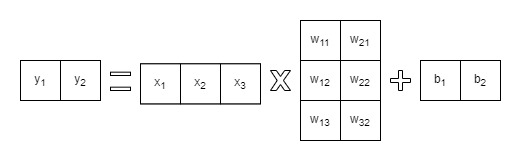

$y_1 = \sum\limits_{i=1}^3(x_i*w_{1i}) + b_1$ Note, this is still the same as before.

$y_2 = \sum\limits_{i=1}^3(x_i*w_{2i}) + b_2$

The ouput of the original upper neuron has not been changed by the additon of the new neuron. Note, the ouput from this layer has a the same format as the input but with one less number. This output could be used as the input to another layer.


In [ ]:
#neuron parameters
w = np.array([[1, 4],
              [2, 5],
              [3, 6]]) #added [4,5,6] as weights of second neuron to inpt
b = np.array([7, 17])

#inputs (unchaged from before)
x = np.array([[5, 10, 15]])

#ouput
y = np.matmul(x,w) + b

#printing output
print("inputs:\n", x)
print("Weights:\n", w)

print("The output y of the neuron is:\n", y)

inputs:
 [[ 5 10 15]]
Weights:
 [[1 4]
 [2 5]
 [3 6]]
The output y of the neuron is:
 [[ 77 177]]


## **Adding an extra layer:**


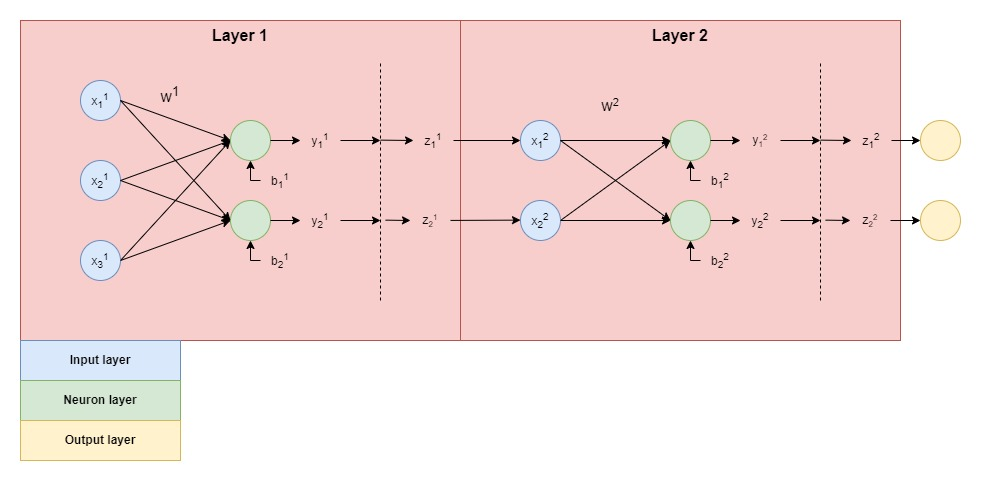
Note the output of the first layer is the input to the second layer:

$x_1^2 = z_1^1$

$x_2^2 = z_2^1$

As a result of this we can remove the input neurons from the second layer, after which we arrive at a neural network very similar to the original image we saw. While these images are nice representations of a layer is still just 1 matrix representing the weights, and 1 representing the bias and a neural network is just a set of these layers.

In [ ]:
#parameters of first layer
w1 = np.array([[1, 4], [2, 5], [3, 6]]) #np.array([[1, 2, 3], [4, 5, 6]]) # same the first layer has the same weights as before
b1 = np.array([[7, 17]])

#parameters of second layer
w2 = np.array([[7, 9], [8, 10]]) # this layer has only 2 inputs and 2 neurns so weights is a 2x2 matrix
b2 = np.array([[26, 36]]) #this layer has 2 neurons so we have 2 biases

#inputs (unchaged from before)
x = np.array([[5, 10, 15]])

#ouput of layer 1
y1 = np.matmul(x,w1) + b1

#output of layer 2
y2 = np.matmul(y1,w2) + b2

#printing output
print("The output of the first latyer is unchanged:\n", y1)
print("The output of hte second layer is:\n", y2)

The output of the first latyer is unchanged:
 [[ 77 177]]
The output of hte second layer is:
 [[1981 2499]]




## **Now lets build a layer using a deep learning library:**

In [ ]:
#import tensorflow as tf
from tensorflow import keras

#create input vector as before
x = np.array([[5, 10, 15]])

#this creates a layer object, but it is not actually intialised.
dense_layer1 = keras.layers.Dense(2)
#this tells the layer how many inputs to expect, which tells it how many weights are necessary.
dense_layer1.build(x.shape)
#this line is just setting the weights of the neuron to be the same as the ones we hd earlier.
dense_layer1.set_weights([w1, b1[0]])

#this is how we can make a forward pass on the layer
y = dense_layer1(x)

#print outputs
print("The inputs are unchanged:\n{}".format(x))
print("The output is also the same:\n{}".format(y))

The inputs are unchanged:
[[ 5 10 15]]
The output is also the same:
[[ 77. 177.]]


## **Building the two layer structure we had before:**

In [ ]:
#create input vector as before
x = np.array([[5, 10, 15]])

#both layers have 2 neurons
dense_layer1 = keras.layers.Dense(2)
dense_layer2 = keras.layers.Dense(2)

dense_layer1.build(x.shape)#telling the layer the number of inputs, same as before
dense_layer2.build(dense_layer1(x).shape) #dont worry we wont always have to setup the layers like this

dense_layer1.set_weights([w1, b1[0]]) #set weights of first layer as before
dense_layer2.set_weights([w2, b2[0]]) #set weights of second layer exactly as for first layer

#get outputs of layers
y1 = dense_layer1(x)
y2 = dense_layer2(y1)

#print outputs
print("The inputs are unchanged:\n{}".format(x))
print("The output of layer 1 is:\n{}".format(y1))
print("The output of layer 2 is:\n{}".format(y2))

The inputs are unchanged:
[[ 5 10 15]]
The output of layer 1 is:
[[ 77. 177.]]
The output of layer 2 is:
[[1981. 2499.]]


# **The Activation functions that we have ignored so far**


The activation function is applied to the output of a layer. Their purpose is to introduce non-linarity to the neural network forward pass (the calculations we just did). Note, at the moment we just have a series of linear matrix calculations, for example considering the two layer case we juts had:

$\begin{bmatrix}y_1^2&y_1^2\end{bmatrix} = \begin{bmatrix}7&9\\8&10\end{bmatrix}\times\Biggl(\begin{bmatrix}x_1&x_2&x_3\end{bmatrix}\times
\begin{bmatrix}1&4\\2&5\\3&6\end{bmatrix}+\begin{bmatrix}7&17\end{bmatrix}\Biggr)+\begin{bmatrix}26&36\end{bmatrix} = \begin{bmatrix}39x_1+54x_2+69x_3+211&49x_1+68x_2+87x_3+269\end{bmatrix}=\begin{bmatrix}1981&2499\end{bmatrix}$

The activation function makes the forward pass nonlinear. Here I will now show you several activation functions:

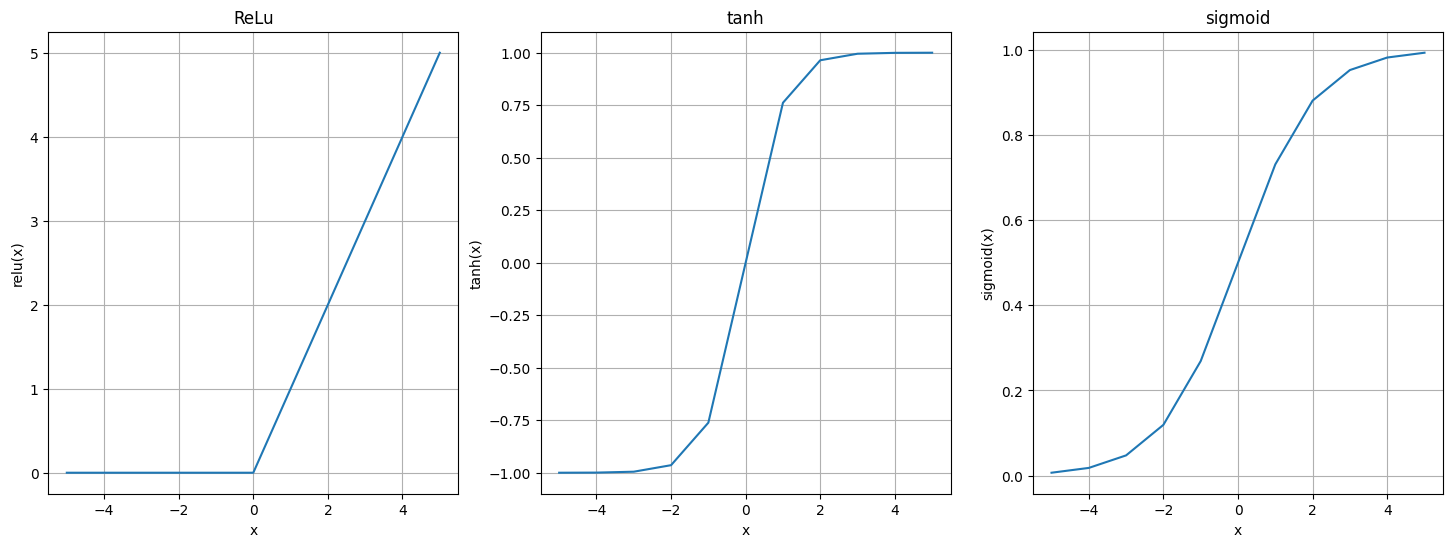

In [ ]:
from matplotlib import pyplot as plt

vals = np.arange(-5, 6, dtype=float)

fig, axs = plt.subplots(1,3)

fig.set_size_inches(18, 6)
axs[0].plot(vals, keras.activations.relu(vals))
axs[0].set_xlabel("x")
axs[0].set_ylabel("relu(x)")
axs[0].set_title("ReLu")
axs[0].grid()

axs[1].plot(vals, keras.activations.tanh(vals))
axs[1].set_xlabel("x")
axs[1].set_ylabel("tanh(x)")
axs[1].set_title("tanh")
axs[1].grid()

axs[2].plot(vals, keras.activations.sigmoid(vals))
axs[2].set_xlabel("x")
axs[2].set_ylabel("sigmoid(x)")
axs[2].set_title("sigmoid")
axs[2].grid()

# **Lets train the two layer neural network to approximate the sin(x) function:**



In [ ]:
sin_x_model = keras.Sequential([  keras.layers.Input((1,)), # The input value is a singular x value
                                  keras.layers.Dense(16, activation='relu'), # the first layer has 16 neurons
                                  keras.layers.Dense(16, activation='relu'), # the second layer has 16 neurons
                                  keras.layers.Dense(1)]) # the third layer, which is also the ouput has 1 neuron because sin(x) function outputs 1 value)

sin_x_model.compile()#initalises the weights and biases of the model

## **We now have a neural network model but it is untrained.**
What that means is that the weights and biases of the neural network are just random values of no patcular meaning. For instance if we pass a value of $\frac{\pi}{2}$ to the network it should return 1, as $sin(\frac{\pi}{2}) = 1$. But instead it returns:

In [ ]:
print(sin_x_model(np.array([np.pi/2])))

tf.Tensor([[0.22337456]], shape=(1, 1), dtype=float32)


## **Training a neural network is the process of finding weights and biases that will cause the network to approximate the desired function.**


There are theoretical proofs that state a network of sufficient depth (number of layers) and sufficient width (maximum number of neurons in any layer) can approximate any function. The only challenges is finding the weights and biases of the layers.

To train a neural network in a supervised learning manner we require a dataset of inputs( x values) and corresponding true values (sin(x) values). The neural network then tries to learn a parameters (weights and biases) that approximate the provided dataset. This is similar to drawing a line of best fit through for a set of x and y points plotted on a graph. But there are 3 differences:

1.   instead of having only 2 parameters of the line to optimise there could be billions,
2.   There could be multiple inputs and ouptus meaning the line is really a surface

3. the line or surface is non-linear

### **So lets create a dataset.**

Note we will ask the network to learn: $sin(2\pi x)$ instead of $sin(x)$ so that all inputs and outputs are between 0 and 1, which makes it easier for the netowrk to learn.

In [ ]:
x_train = np.random.random((10240))# 10240 random values between 0 and 1
y_train = np.sin(x_train*2*np.pi)# the value of sin(2pi*x) i.e. y

print("The x values are:\n{}".format(x_train))
print("The y values are:\n{}".format(y_train))

The x values are:
[0.73960586 0.31404813 0.41492641 ... 0.23998004 0.19596228 0.35040284]
The y values are:
[-0.99786817  0.92011345  0.50943938 ...  0.99801885  0.94291163
  0.80752666]


In [ ]:
# the loss function is the metric which we are looking to minimise.
# in this case we specfiy the mean squared error between the desired ouputs of the model and the actual ouputs.
loss_func = keras.losses.MeanSquaredError()

# dont worry about the optimizer for now. We will cover this next workshop.
optimizer = keras.optimizers.SGD()

# how often to go over the entire dataset.
num_epochs = 100

# we need to recompile the model, because previsouly we did not add a loss function or an optimizer.
sin_x_model.compile(loss=loss_func, optimizer = optimizer)

# for now we dont need to worry about how the .fit() function is working. All we need to know it that,
# the model is learning parameters that minimise the loss function.
sin_x_model.fit(x_train, y_train, epochs=num_epochs, batch_size=64)

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4943
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3857
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2643
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1838
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1573
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1519
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1462
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1470
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1422
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1432
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1390
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1387
Epoch 13/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1349
Epoch 14/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1300
Epoch 15/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0

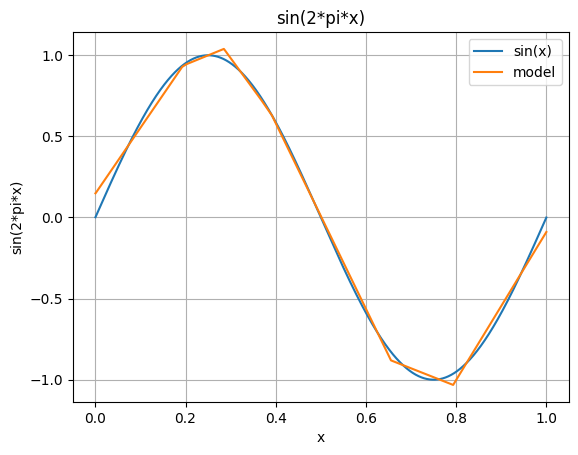

In [ ]:
# The network has now been trained. Lets test it on 10240 new x values that it hasnt seen before

x_test = np.random.random((10240))# 10240 random values between 0 and 1
y_test = np.sin(x_test*2*np.pi)# the value of sin(2pi*x) i.e. y

y_test_predictions = np.array(sin_x_model(x_test)[:,0])#get the model to make predictions for the y values of this dataset

#sort the x values so that we can create a classic sin plot
arg_sort = x_test[:].argsort()
x_test_sorted = x_test[arg_sort]
y_test_sorted = y_test[arg_sort]
y_test_predictions = y_test_predictions[arg_sort]


#create a nice plot
plt.plot(x_test_sorted[:], y_test_sorted[:], label='sin(x)')
plt.plot(x_test_sorted, y_test_predictions[:], label='model')
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("sin(2*pi*x)")
plt.title("sin(2*pi*x)")
plt.show()

# **Lets revist the activation function now**

### The activation function is what adds nonlinarity to your network. Without it you simply have a series of linear matrix multiplications.

### To explain this we will now retrain our model with the same dataset and architecture but removing the activation function from the dense layers. What do you think the networks predictions for the test dataset will look like?

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3504
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2039
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1971
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1988
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1943
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1994
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1962
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1998
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1984
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1974
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1978
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1990
Epoch 13/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1946
Epoch 14/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1970
Epoch 15/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1

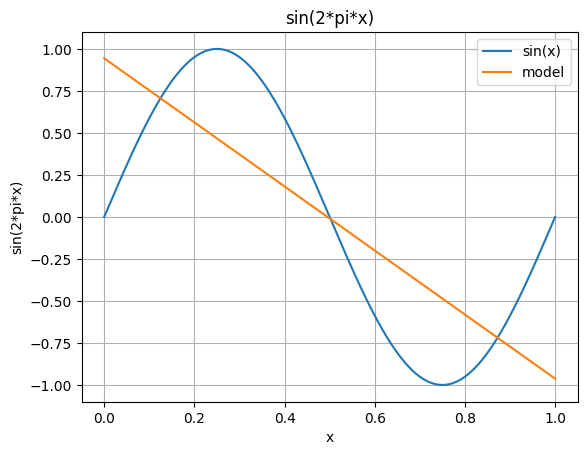

In [ ]:
#create a neural network the same neural network, but without activation functions.
sin_x_model_2 = keras.Sequential([  keras.layers.Input((1,)),
                                    keras.layers.Dense(16,),
                                    keras.layers.Dense(16),
                                    keras.layers.Dense(1)])

loss_func = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.SGD()

sin_x_model_2.compile(loss=loss_func, optimizer=optimizer)#initalises the weights and biases of the model


#get the model to make a guess for all 10240 data points.
sin_x_model_2.fit(x_train, y_train, epochs=num_epochs, batch_size = 64)

#create test dataset and get predictions
x_test = np.random.random((10240))# 10240 random values between 0 and 1
y_test = np.sin(x_test*2*np.pi)# the value of sin(2pi*x) i.e. y

y_test_predictions = np.array(sin_x_model_2(x_test)[:,0])
arg_sort = x_test[:].argsort()
x_test_sorted = x_test[arg_sort]
y_test_sorted = y_test[arg_sort]
y_test_predictions = y_test_predictions[arg_sort]


#create a nice plot
plt.plot(x_test_sorted[:], y_test_sorted[:], label='sin(x)')
plt.plot(x_test_sorted, y_test_predictions[:], label='model')
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("sin(2*pi*x)")
plt.title("sin(2*pi*x)")
plt.show()

# **Task 1: Train a neural network to approximate the x^2 function**



Train Steps:
1.   Create a dataset of x values ϵ [0, 1] and labels or y values that are y=x^2.
2.   Create a Sequential neural network object, while adding a list of layers. use *keras.layers.Input()*, *keras.layers.Dense()*, and *keras.Sequential()*.
3. create a loss function object. Just use keras.losses.MeanSquaredError().
4. create a optimizer object. Just use *Keras.optimizers.SGD()*
5. compile your model using *.compile(loss_func, optimizer)*
6. call *.fit()* on your model with a batch_size parameter of 64, for number of epochs use as many as you like.

Test steps:
1. Create a dataset of x values ϵ [0, 1] and labels or y values that are y=x^2.
2. get your to make predictions for the x values. e.g. *y_prediction = model(x_test)*
3. Calculate the loss using:

  $loss_{MSE} = \frac{1}{n}\sum\limits_{i=0}^n(y-\hat{y})^2$
  
  $n = $ number of test points

  $y = $ labels of test data

  $\hat{y} =$ model predictions of labels

4. Compare loss against loss obtained using *loss_func(y, y_predictions)*. They should be the same
5. test your model's ability to predict arbitary values e.g. test
[-10, -5, -1, -0.5, -0.1, 0, 0.1, 0.5, 1, 5, 10]
6. What is happening for values $x<0$ and $x>1$? is this over fitting?



In [ ]:
# create dataset as numpy arrays using np.random.random(),


# Create a sequentail network and add layers as above


# create loss_func and optimizer


# Create a sequentail network and add layers as above


# compile model


# call fit() function to train your network



In [ ]:
# create a test dataset


# get model to make predictions


# calculate loss using formula. Dont use the loss_func object yet


# now compare against loss obtined from keras loss_func object (should be the same).


# test values of x=[-10, -5, -1, -0.5, -0.1, 0, 0.1, 0.5, 1, 5, 10]

# **Training a model to classify points as belonging to x^2 or sin(x)**


Model takes as input a y value and an x value and outputs probabilities that this value belongs to the x^2 or sin(x) function

In [ ]:
import numpy as np
from tensorflow import keras

x_points = np.random.random((5120, 1)) # create random x values
sin_points = np.sin(x_points*2*np.pi) # get sin(x) values
squared_points = x_points**2 #get x^2 values


#one input is an x and y coordinate, the output should inidicate probability that its from a sin(x) or x^2 distribution
inputs = np.empty((10240, 2)) # inputs to NN
inputs[0:5120, 0] = x_points[:,0] # both sin(x) and x^2 points use the same inputs
inputs[5120:10240, 0] = x_points[:,0]

inputs[0:5120, 1] = sin_points[:,0] # the y values
inputs[5120:10240, 1] = squared_points[:,0] # both sin(x) and x^2 points use the same inputs

labels=np.zeros((10240, 2))
labels[0:5120, 0] = 1
labels[5120:10240, 1] = 1

#shuffle data
key = np.arange(10240)
np.random.shuffle(key)
labels = labels[key, :]
inputs = inputs[key, :]

#try a point not from eihter distribution to see what happens
print("Inputs:\n{}".format(inputs))
print("labels:\n{}".format(labels))

Inputs:
[[ 0.82781226 -0.88284585]
 [ 0.20058548  0.95218684]
 [ 0.07676212  0.46382743]
 ...
 [ 0.48073655  0.12074053]
 [ 0.55896962 -0.36209742]
 [ 0.20868183  0.96649024]]
labels:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
model_classification = keras.Sequential([  keras.layers.Input((2,)), # The input value is a singular x value
                                  keras.layers.Dense(64, activation='relu'), # the first layer has 16 neurons
                                  keras.layers.Dense(64, activation='relu'), # the second layer has 16 neurons
                                  keras.layers.Dense(2, activation='sigmoid')]) # the third layer, which is also the ouput has 1 neuron because sin(x) function outputs 1 value)

loss_func = keras.losses.CategoricalCrossentropy()
optiimizer=keras.optimizers.Adam()
model_classification.compile(loss=loss_func, optimizer=optiimizer)#initalises the weights and biases of the model
model_classification.fit(x=inputs, y=labels, epochs=100, batch_size=64)


In [ ]:
test_x_points = np.random.random((1000, 1))
test_sinx_points = np.sin(test_x_points*np.pi*2)
test_x2_points= test_x_points**2

test_data = np.empty((2000,2))

test_data[0:1000, 0] = test_x_points[:, 0]
test_data[0:1000, 1] = test_sinx_points[:, 0]

test_data[1000:2000, 0] = test_x_points[:, 0]
test_data[1000:2000, 1] = test_x2_points[:, 0]

model_predictions = model_classification(test_data)

In [ ]:
confusion = np.zeros((2,2))

for i in range(test_data.shape[0]):
  if model_predictions[i, 0] > model_predictions[i, 1]: # if predict sin(x) point
    if i<1000: # all points of i<1000 are from sin(x) distribution
      confusion[0, 0] +=1
    else: #data point is actually from x^2 distribution
      confusion[0, 1] += 1
  else:
    if i<1000: # all points of i<1000 are from sin(x) distribution
      confusion[1, 0] +=1
    else: #data point is actually from x^2 distribution
      confusion[1, 1] += 1

#print(test_data.shape[0])
print(confusion)
print(int(confusion[1, 0]), " sin(x) incorrectly classified as x^2 points")
print(int(confusion[0, 1]), "x^2 incorrectly classified as sin(x) points")
print("is the network over fitting? What is going on?")


In [ ]:
from matplotlib import pyplot as plt

test_x_points_sorted = np.sort(test_x_points[:,0])

plt.plot(test_x_points_sorted, np.sin(2*np.pi*test_x_points_sorted))
plt.plot(test_x_points_sorted, test_x_points_sorted**2)
plt.legend(["sin(x)", "x^2"])
plt.show()

In [ ]:

for i in range(test_data.shape[0]):
  if model_predictions[i, 0] > model_predictions[i, 1]:
    if i>=1000:
      print("data point :({},{}), probability predictions: {}".format(f'{test_x_points[i-1000, 0]:.3}', f'{test_x_points[i-1000, 0]**2:.3}', model_predictions[i, :]))
  else:
    if i<1000:
      print("data point :({},{}), probability predictions: {}".format(f'{test_x_points[i, 0]:.3}', f'{np.sin(test_x_points[i, 0]):.3}', model_predictions[i, :]))

# **Home work 1: Calculus and the Chainrule**

Find $\frac{dL}{dw_1}$ and $\frac{dL}{db_1}$ using the chain rule for:

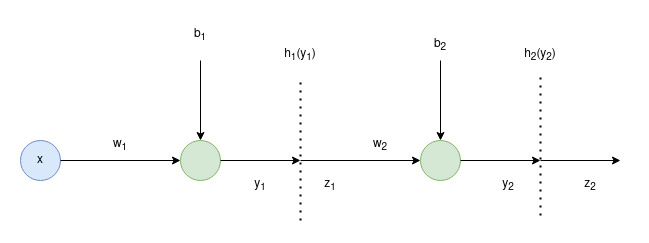

Consider $\hat{z}$ to be constant

  $L = (\hat{z}-z_2)^2$   Note: we are now using $\hat{z}$ as the true value, and $z_2$ as the output from the network
  
  $z_2=h_2(y_2) = tan(y_2)$
  
  $y_2=w_2*z_1+b_2$

  $z_1=h_1(y_1) = \frac{1}{1+e^{-y_1}}$

  $y_1=w_1*x+b_1$


# **Solutions homework 1!!!**

we can calculate the derivative of the loss with respect to $w_1$ and $b_1$ usingthe chain rule. Specfically we can unravel the chain rule backward through the network:

$\frac{dL}{dw_1} = \frac{dL}{dz_2} *(\frac{dz_2}{dw_1}) = \frac{dL}{dz_2} *(\frac{dz_2}{dy_2}*\frac{dy_2}{dz_1}*\frac{dz_1}{dy_1}*\frac{dy_1}{dw_1})$

similarly

$\frac{dL}{db_1} = \frac{dL}{dz_2} *(\frac{dz_2}{db_1}) = \frac{dL}{dz_2} *(\frac{dz_2}{dy_2}*\frac{dy_2}{dz_1}*\frac{dz_1}{dy_1}*\frac{dy_1}{db_1})$


Now we can obtain the expressions for each of these derivatives by differentiating the definitions above:

$\frac{dL}{dz_2} = -2*(\hat{z}-z_2)$

$\frac{dz_2}{dy_2} = \frac{d}{dy_2}\tan(y_2)= \frac{1}{\cos^2(y_2)}$

$\frac{dy_2}{dz_1}=w_2$

$\frac{dz_1}{dy_1}= \frac{d}{dy_1} \frac{1}{1+e^{-y_1}} = 1-\frac{1}{1+e^{-y_1}}$

$\frac{dy_1}{dw_1} = x$

$\frac{dy_1}{db_1} = 1$

Finally we have all our components so:

$\frac{dL}{dw_1} = -2(\hat{z}-z)*(\frac{1}{\cos^2(y_2)})*w_2*(1-\frac{1}{1+e^{-y_1}}) * x$

$\frac{dL}{db_1} = -2(\hat{z}-z)*(\frac{1}{\cos^2(y_2)})*w_2*(1-\frac{1}{1+e^{-y_1}})$

These are all values that we know so we can calculate the gradient of the loss with respect to the parameters of our network ($w_1$ and $w_2$).

We can also look at the gradient with respect to $w_2$ and $b_2$:

$\frac{dL}{dw_2} = \frac{dL}{dz_2} *(\frac{dz_2}{dw_2}) = \frac{dL}{dz_2} * (\frac{dz_2}{dy_2}*\frac{dy_2}{dw_2})=-2(\hat{z}-z)*(\frac{1}{\cos^2(y_2)})*z_1$

$\frac{dL}{dw_2} = \frac{dL}{dz_2} *(\frac{dz_2}{dw_2}) = \frac{dL}{dz_2} * (\frac{dz_2}{dy_2}*\frac{dy_2}{dw_2})=-2(\hat{z}-z)*(\frac{1}{\cos^2(y_2)})$


# **Homework 2 extra nonexistent credit: Train neural network to classify MNIST dataset**


Use the following code to get the dataset
> from keras.datasets import mnist

> (x_train, y_train), (x_test, y_test) = mnist.load_data()

**Tip: for a dense layer to be able to act on an input it must be a 1 dimensional array, it cant be a 2 dimensional array such as an image. use keras.layers.flatten() to flatten an image into a long 1 dimensional array before passing it to your neural network.**

each image is 28 pixels by 28 pixels
in total there are 60000 different hand drawn figures of numbers
6000 of each 0-9
play with the dataset and try to train a neural network to solve it


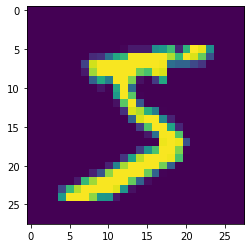

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])

print("each image is 28 pixels by 28 pixels")
print("in total there are 60000 different hand drawn figures of numbers")
print("6000 of each 0-9")
print("play with the dataset and try to train a neural network to solve it")


# **END**